<a href="https://colab.research.google.com/github/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/blob/master/chapter9/Causal_Impact_Volkswagen.ipynb" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tfcausalimpact

  Created wheel for tfcausalimpact: filename=tfcausalimpact-0.0.5-cp37-none-any.whl size=37539 sha256=eeec5279d608e5955a4a6082fd80e59803d185e9e9369681ee32046ddffe8cf7
  Stored in directory: /root/.cache/pip/wheels/4e/26/47/3cbc3d16444279e2862875c893d3dcaff7a602fdeb9cbe7cf5
Successfully built tfcausalimpact


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "17"
plt.rcParams['figure.figsize'] = [16, 6]

In [ ]:
import pandas as pd
from causalimpact import CausalImpact

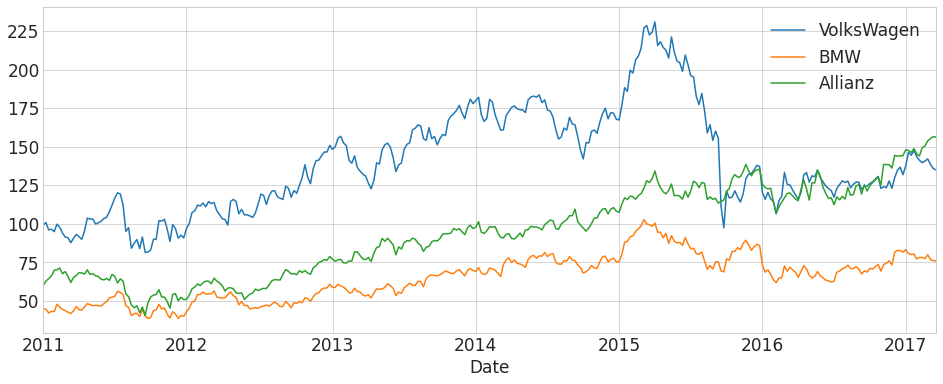

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/WillianFuks/tfcausalimpact/master/tests/fixtures/volks_data.csv", header=0, sep=' ', index_col='Date', parse_dates=True)
data.plot();

In [ ]:
pre_period = [str(np.min(data.index.values)), "2015-09-13"]
post_period = ["2015-09-20", str(np.max(data.index.values))]

ci = CausalImpact(data.iloc[:, 0], pre_period, post_period, model_args={'nseasons': 52, 'fit_method': 'vi'})

In [ ]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    126.91             10026.07
Prediction (s.d.)         171.28 (17.33)     13531.49 (1369.17)
95% CI                    [136.07, 204.01]   [10749.78, 16116.83]

Absolute effect (s.d.)    -44.37 (17.33)     -3505.42 (1369.17)
95% CI                    [-77.1, -9.16]     [-6090.76, -723.71]

Relative effect (s.d.)    -25.91% (10.12%)   -25.91% (10.12%)
95% CI                    [-45.01%, -5.35%]  [-45.01%, -5.35%]

Posterior tail-area probability p: 0.01
Posterior prob. of a causal effect: 99.2%

For more details run the command: print(impact.summary('report'))


In [ ]:
print(ci.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 126.91. By contrast, in the absence of an
intervention, we would have expected an average response of 171.28.
The 95% interval of this counterfactual prediction is [136.07, 204.01].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -44.37 with a 95% interval of
[-77.1, -9.16]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 10026.07.
By contrast, had the intervention not taken place, we would have expected
a sum of 13531.49. The 95% interval of this prediction is [10749.78, 16116.83].


The above results are given in terms of absolute numbers. In relative
terms, the re

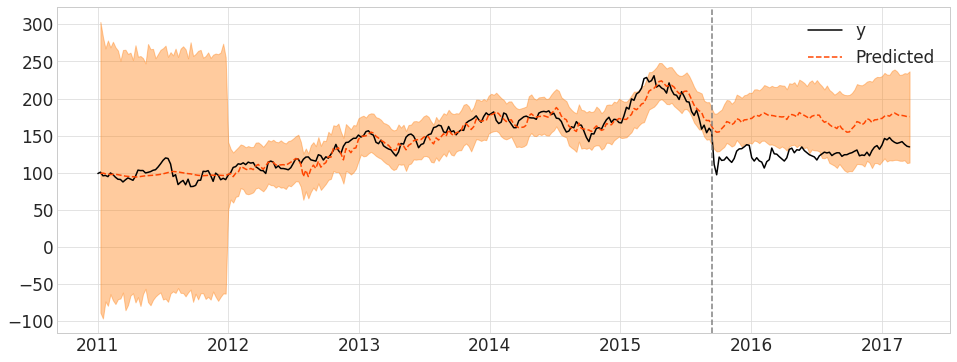

In [ ]:
ci.plot(panels=["original"], figsize=(16, 6))

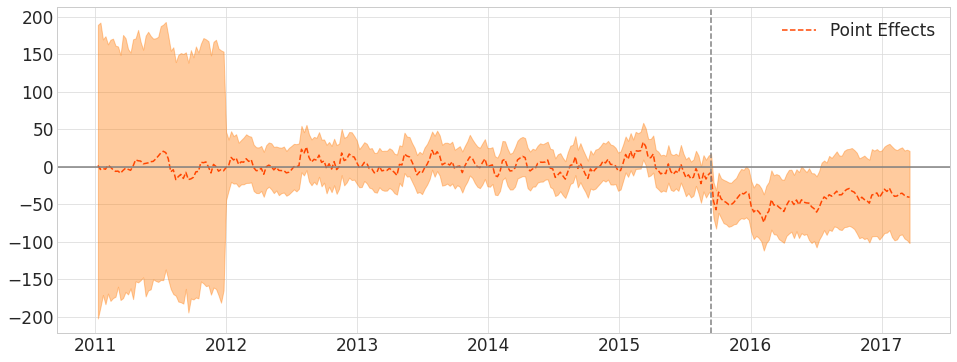

In [ ]:
ci.plot(panels=["pointwise"], figsize=(16, 6))